Installing Dependencies and Setup 


In [ ]:
#installing Libraries 
#!pip install tensorflow 
#!pip install opencv-python
#!pip install tensorflow
#!pip list 

In [ ]:
# importing  Dependencies 
import os 
import tensorflow as tf

In [ ]:
#os.listdir("data")

In [ ]:
#Check the version of TensorFlow you are using
#print(tf.__version__)

# avoid OOM errors by setting GPU Memory consumption growth 
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
print(len(gpus))
print(tf.config.list_physical_devices('GPU'))


1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Remove dodgy Images

In [ ]:
# importing Dependencies
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Dataset_colab/data_faces/data_faces'

In [ ]:
image_exts = ['jpeg','jpg','bmp','png'] 

In [ ]:
# reads the folder data_faces , put it into list
os.listdir(data_dir)

['Sad_faces', 'Happy_faces']

In [ ]:
# reads the files from the folder data_faces --> 'Happy_faces'  put it into the list
#os.listdir(os.path.join(data_dir,'Happy_faces'))

In [ ]:
t =cv2.imread(os.path.join(data_dir,"Happy_faces","smiling_woman_with_hat_197444.jpg"))

In [ ]:
# t # read the image in numpy array
#type(t)
t.shape   # high,wide,color

(496, 600, 3)

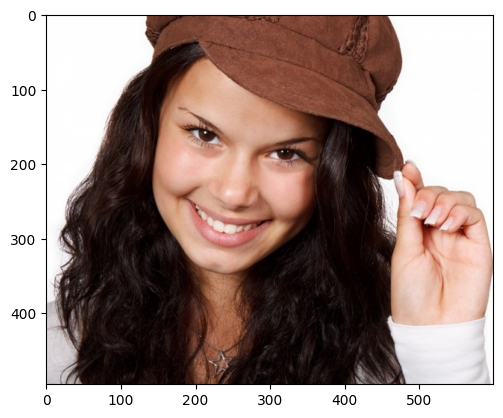

In [ ]:
# plt.imshow(t) # open cv reads the image in bgr
plt.imshow(cv2.cvtColor(t, cv2.COLOR_BGR2RGB)) # code to diplay the image in rbg 
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir, image_class,image)
    try:
      img = cv2.imread(image_path)  # load image
      tip = imghdr.what(image_path) #
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e :
      print("Issue with image{}".format(image_path))
      #os.remove(image_path)


Load Data

In [ ]:
import numpy as np


In [ ]:
# tf.data.Dataset??   # gives documentation  "??" 
#tf.keras.utils.image_dataset_from_directory??


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 575 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [ ]:
# Get Another batch from the iterator >>>>>>>> gets new batch each time you run
batch = data_iterator.next()
len(batch) # there are 2 parts of this dataset images and labels 

2

In [ ]:
# Images Represented as numpy arrays
print(batch[0].shape)
# Labels of the images 
print(batch[1])


(32, 256, 256, 3)
[0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1]


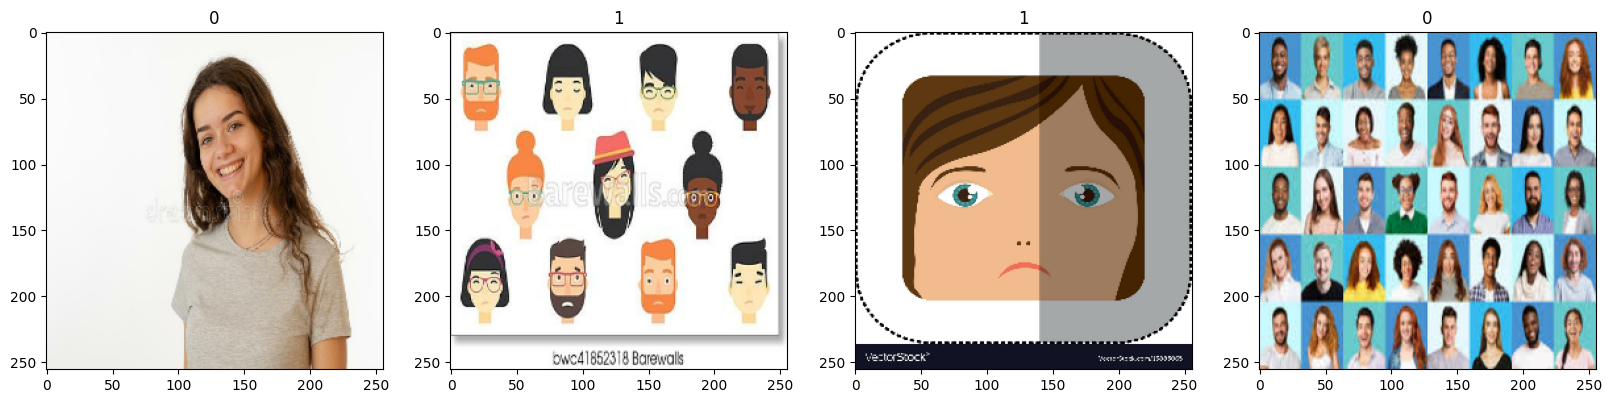

In [ ]:
# Class 1 = Sad people
# Class 0 = Happy people 

fig,ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Making the batch to scale from 0-255 to 0-1
(batch[0] / 255).max()

1.0

Preprocessing 

In [ ]:
# scaling the image values to 0-1 instead of 0-255
# split up data into Train >> Test >> Validation

Scale Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 575 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data = data.map(lambda x , y : (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

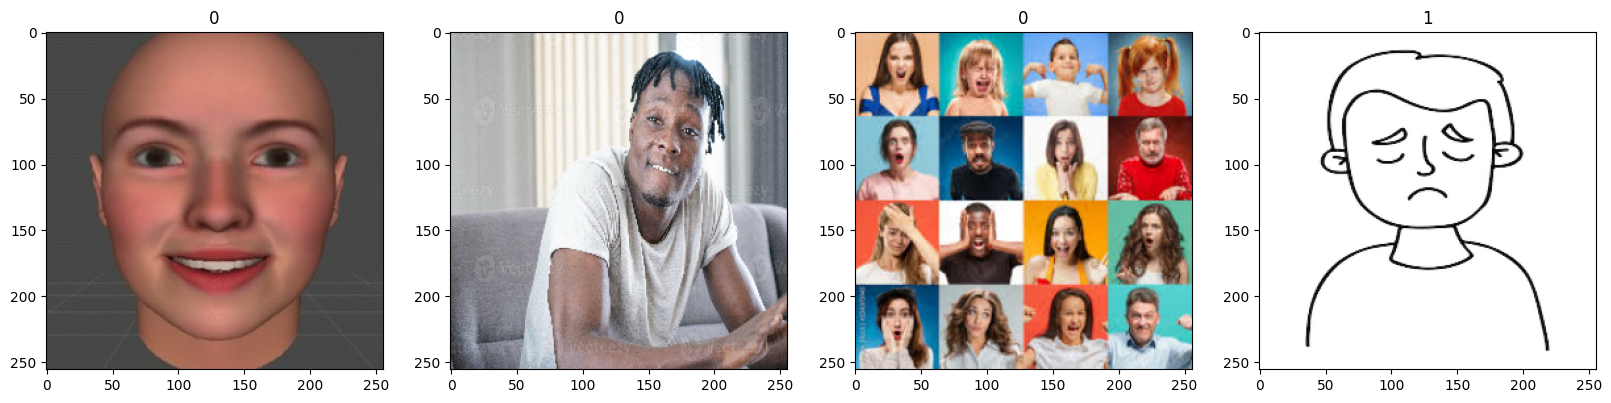

In [ ]:
fig,ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)   # now it's not integer
  ax[idx].title.set_text(batch[1][idx])

Split Data

In [ ]:
len(data)*0.8

14.4

In [ ]:
# train and test Size 
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)


In [ ]:
train_size + val_size + test_size

16

In [ ]:
# Take and skip methods in tensorflow
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
len(test)

3

Deep Model

Build Deep learning Model

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing Dependencies 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [ ]:
model = Sequential()

In [ ]:
# MaxPooling2D ??
# Conv2D ??

In [ ]:
# Input Layer , Convolution layer ,
model.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3))) # Architechtural decisions in image classification(#filter , stride, activation , inputshape(h,w,#colors) etc)
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation  = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation  = 'relu'))
model.add(MaxPooling2D())

# this layer makes an array of features from previous layers
model.add(Flatten())
# fully connected Layers

model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) # last layers


In [ ]:
#tf.optimizers??


In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train the model

In [ ]:
logdir = 'logs'

In [ ]:
# Callback for save a model 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 50, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/50
10/10 [==============================] - 31s 1s/step - loss: 0.7759 - accuracy: 0.5437 - val_loss: 0.6519 - val_accuracy: 0.6042
Epoch 2/50
10/10 [==============================] - 14s 1s/step - loss: 0.6133 - accuracy: 0.7125 - val_loss: 0.5410 - val_accuracy: 0.7083
Epoch 3/50
10/10 [==============================] - 15s 1s/step - loss: 0.5280 - accuracy: 0.7437 - val_loss: 0.4646 - val_accuracy: 0.7812
Epoch 4/50
10/10 [==============================] - 15s 1s/step - loss: 0.3807 - accuracy: 0.8531 - val_loss: 0.3246 - val_accuracy: 0.8438
Epoch 5/50
10/10 [==============================] - 16s 1s/step - loss: 0.3190 - accuracy: 0.8625 - val_loss: 0.1748 - val_accuracy: 0.9688
Epoch 6/50
10/10 [==============================] - 15s 1s/step - loss: 0.2262 - accuracy: 0.9094 - val_loss: 0.2655 - val_accuracy: 0.8958
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 0.1841 - accuracy: 0.9375 - val_loss: 0.0818 - val_accuracy: 0.9896
Epoch 8/50
10/10 [==

Plot Performance

In [ ]:
# loss and accuracy values for train and val data
#hist.history

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss Plot', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
fig.suptitle('Accuracy Plot', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Evaluate Performance

Evaluate

In [ ]:
# importing the dependencies for evalution >> the key metric
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 114ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


Test

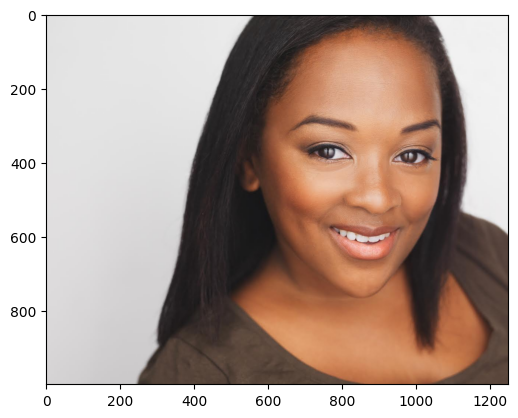

In [ ]:
test_sad = '/content/RDjr_sad.jpg'
test_happy = '/content/smiling-face.jpg'

img = cv2.imread(test_happy)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

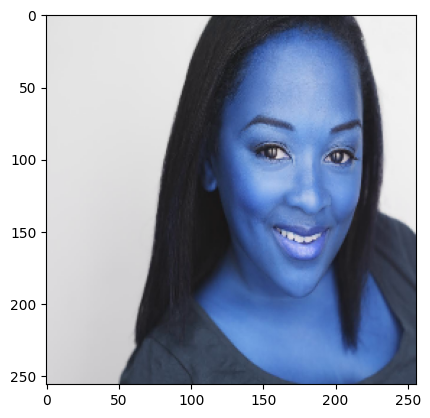

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize = (resize/255)
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
# encapsulate it inside the other set of arrays and scaling it to not put singular value
yhat = model.predict(np.expand_dims(resize,0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
yhat

array([[0.73419833]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
